# Final Group Project
## Credit Card Customer Segmentation data | Kaggle

This dataset provides customer information to predict customer attrition for a consumer credit card portfolio.

Variables in the dataset:

CLIENTNUM: Unique identifier for each customer. (Integer) <br>
Attrition_Flag: Flag indicating whether or not the customer has churned out. (Boolean) <br>
Customer_Age: Age of customer. (Integer) <br>
Gender: Gender of customer. (String) <br>
Dependent_count: Number of dependents that customer has. (Integer) <br>
Education_Level: Education level of customer. (String) <br>
Marital_Status: Marital status of customer. (String) <br>
Income_Category: Income category of customer. (String) <br>
Card_Category: Type of card held by customer. (String) <br>
Months_on_book: How long customer has been on the books. (Integer) <br>
Total_Relationship_Count: Total number of relationships customer has with the credit card provider. (Integer) <br>
Months_Inactive_12_mon: Number of months customer has been inactive in the last twelve months. (Integer) <br>
Contacts_Count_12_mon: Number of contacts customer has had in the last twelve months. (Integer) <br>
Credit_Limit: Credit limit of customer. (Integer) <br>
Total_Revolving_Bal: Total revolving balance of customer. (Integer) <br>
Avg_Open_To_Buy: Average open to buy ratio of customer. (Integer) <br>
Total_Amt_Chng_Q4_Q1: Total amount changed from quarter 4 to quarter 1. (Integer) <br>
Total_Trans_Amt: Total transaction amount. (Integer) <br>
Total_Trans_Ct: Total transaction count. (Integer) <br>
Total_Ct_Chng_Q4_Q1: Total count changed from quarter 4 to quarter 1. (Integer) <br>
Avg_Utilization_Ratio: Average utilization ratio of customer. (Integer) <br>
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such <br>

In [1]:
#Importing Libraries

import numpy as np
import math
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score , roc_curve , auc
import matplotlib.pylab as plt
from dmba import regressionSummary , classificationSummary, plotDecisionTree
from dmba import liftChart , gainsChart
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

In [48]:
# Reading the dataset
bank_churn_db = pd.read_csv("BankChurners.csv")
bank_churn_db.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
9644,779685558,Existing Customer,53,M,5,Graduate,Single,$120K +,Gold,36,...,34516.0,2088,32428.0,0.822,15290,123,0.732,0.060,0.000156,0.99984
8498,812446158,Existing Customer,54,F,3,Uneducated,Single,Less than $40K,Blue,49,...,1719.0,0,1719.0,0.579,4869,65,0.512,0.000,0.000121,0.99988
4447,709563258,Attrited Customer,50,F,2,Uneducated,Single,Unknown,Blue,41,...,2751.0,2253,498.0,0.497,2108,40,0.481,0.819,0.994620,0.00538
1002,778706508,Existing Customer,43,M,4,College,Married,$60K - $80K,Blue,24,...,6231.0,0,6231.0,1.054,1448,30,0.875,0.000,0.000588,0.99941
6854,712285908,Existing Customer,60,F,1,High School,Single,Less than $40K,Blue,49,...,2481.0,1925,556.0,0.723,5228,73,0.780,0.776,0.000120,0.99988
1535,812597508,Existing Customer,39,F,1,High School,Married,$40K - $60K,Blue,34,...,4489.0,2498,1991.0,0.779,2153,58,0.568,0.556,0.000308,0.99969
2976,719528958,Existing Customer,57,F,3,College,Single,$40K - $60K,Blue,36,...,8184.0,1508,6676.0,0.789,4134,71,0.821,0.184,0.000093,0.99991
77,714826758,Existing Customer,37,F,3,Uneducated,Single,Less than $40K,Blue,29,...,7038.0,1801,5237.0,0.751,2339,57,0.966,0.256,0.000232,0.99977
4955,717949983,Existing Customer,47,M,1,Uneducated,Married,$40K - $60K,Blue,36,...,8168.0,2137,6031.0,0.659,3554,82,0.822,0.262,0.000185,0.99982
2828,715468083,Existing Customer,40,F,2,Doctorate,Married,Unknown,Silver,36,...,34516.0,1686,32830.0,0.562,3146,66,0.650,0.049,0.000427,0.99957


In [49]:
#Displaying all columns
bank_churn_db.columns 

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [51]:
#Droping unnecessary columns and checking their datatypes
bank_churn_db = bank_churn_db.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", "Total_Amt_Chng_Q4_Q1","Total_Ct_Chng_Q4_Q1","Total_Relationship_Count"])

bank_churn_db.dtypes

CLIENTNUM                   int64
Attrition_Flag             object
Customer_Age                int64
Gender                     object
Dependent_count             int64
Education_Level            object
Marital_Status             object
Income_Category            object
Card_Category              object
Months_on_book              int64
Months_Inactive_12_mon      int64
Contacts_Count_12_mon       int64
Credit_Limit              float64
Total_Revolving_Bal         int64
Avg_Open_To_Buy           float64
Total_Trans_Amt             int64
Total_Trans_Ct              int64
Avg_Utilization_Ratio     float64
dtype: object

In [52]:
bank_churn_db.shape

(10127, 18)

### Target Variable - Attrition_Flag: 0 or 1, 0 means custormer has churned, 1 means customer has not churned.

In [5]:
bank_churn_db.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [6]:
bank_churn_db.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
4242,714926508,Existing Customer,52,M,2,Graduate,Married,$80K - $120K,Silver,45,4,2,34516.0,1938,32578.0,2275,46,0.056
5340,715204083,Existing Customer,47,F,4,Doctorate,Single,Less than $40K,Blue,36,2,2,2765.0,901,1864.0,4990,80,0.326
9417,827901183,Existing Customer,51,F,2,Graduate,Married,Less than $40K,Blue,47,2,1,5118.0,980,4138.0,14593,109,0.191
1149,709426608,Existing Customer,56,M,1,Doctorate,Married,$60K - $80K,Blue,46,2,4,5248.0,1816,3432.0,2305,45,0.346
7337,713592408,Existing Customer,43,F,3,High School,Married,Less than $40K,Blue,28,3,2,2590.0,0,2590.0,3391,66,0.000
2301,719207733,Existing Customer,61,F,0,High School,Married,Less than $40K,Blue,53,2,0,3396.0,802,2594.0,1418,36,0.236
6086,769720683,Existing Customer,50,F,1,Graduate,Married,Unknown,Blue,44,2,2,5708.0,1884,3824.0,4914,60,0.330
4452,789616158,Existing Customer,33,M,3,Unknown,Divorced,Unknown,Blue,27,1,3,25045.0,0,25045.0,3444,52,0.000
905,708983658,Attrited Customer,51,M,2,Uneducated,Single,$120K +,Blue,39,3,1,16868.0,0,16868.0,940,25,0.000
1474,716757033,Existing Customer,37,M,4,Post-Graduate,Married,$40K - $60K,Blue,27,1,4,6859.0,1766,5093.0,3045,56,0.257


###  A. Which variables are quantitative/numerical? Which are ordinal? Which are nominal?

#### Quantitative/Numerical Variables:

Clientnum (Integer) <br>
Customer_Age (Integer) <br>
Dependent_count (Integer) <br>
Months_on_book (Integer) <br>
Months_Inactive_12_mon (Integer) <br>
Contacts_Count_12_mon (Integer) <br>
Credit_Limit (Integer) <br>
Total_Revolving_Bal (Integer) <br>
Avg_Open_To_Buy (Integer) <br>
Total_Trans_Amt (Integer) <br>
Total_Trans_Ct (Integer) <br>
Avg_Utilization_Ratio (Integer) <br>

#### Ordinal Variables: 

Education_Level (String)<br>
Income_Category (String)<br>

#### Nominal Variables:

Attrition_Flag (Boolean)<br>
Gender (String)<br>
Marital_Status (String)<br>
Card_Category (String)

In [7]:
bank_churn_db.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,2.341167,2.455317,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.010622,1.106225,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [8]:
#Creating a subset dataframe with only numerical variables for statistical analysis
subset_bank_churn_db = bank_churn_db[["CLIENTNUM", "Customer_Age", "Dependent_count", "Months_on_book", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Trans_Amt", "Total_Trans_Ct", "Avg_Utilization_Ratio"]]
subset_bank_churn_db.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,45,3,39,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,49,5,44,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,51,3,36,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,40,4,34,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,40,3,21,1,0,4716.0,0,4716.0,816,28,0.000


### B. Do some statistics on the variables

In [9]:
#Compute mean, standard deviation, min, max, median, length, and missing values for all variables

pd.DataFrame({'mean': subset_bank_churn_db.mean(),
                'Sd': subset_bank_churn_db.std(),
                'min': subset_bank_churn_db.min(),
                'max': subset_bank_churn_db.max(),
                'median': subset_bank_churn_db.median(),
                'length': len(subset_bank_churn_db),
                'miss.val': subset_bank_churn_db.isnull().sum(),
                })

,mean,Sd,min,max,median,length,miss.val
CLIENTNUM,7.391776e+08,3.690378e+07,708082083.0,8.283431e+08,7.179264e+08,10127,0
Customer_Age,4.632596e+01,8.016814e+00,26.0,7.300000e+01,4.600000e+01,10127,0
Dependent_count,2.346203e+00,1.298908e+00,0.0,5.000000e+00,2.000000e+00,10127,0
Months_on_book,3.592841e+01,7.986416e+00,13.0,5.600000e+01,3.600000e+01,10127,0
Months_Inactive_12_mon,2.341167e+00,1.010622e+00,0.0,6.000000e+00,2.000000e+00,10127,0
Contacts_Count_12_mon,2.455317e+00,1.106225e+00,0.0,6.000000e+00,2.000000e+00,10127,0
Credit_Limit,8.631954e+03,9.088777e+03,1438.3,3.451600e+04,4.549000e+03,10127,0
Total_Revolving_Bal,1.162814e+03,8.149873e+02,0.0,2.517000e+03,1.276000e+03,10127,0
Avg_Open_To_Buy,7.469140e+03,9.090685e+03,3.0,3.451600e+04,3.474000e+03,10127,0
Total_Trans_Amt,4.404086e+03,3.397129e+03,510.0,1.848400e+04,3.899000e+03,10127,0


### C. Using histogram and summary statistics

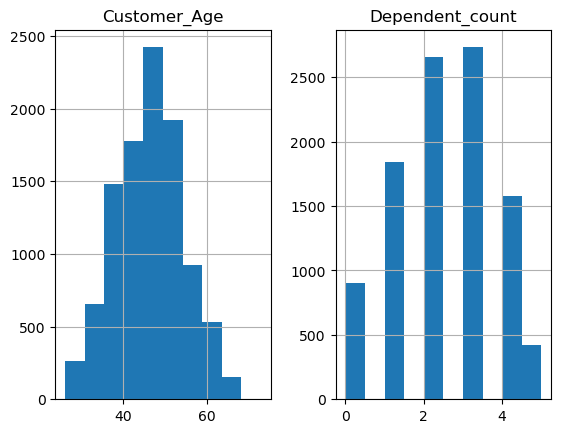

In [10]:
fig, axes = plt.subplots(1, 2)

subset_bank_churn_db.hist('Customer_Age', ax=axes[0])
subset_bank_churn_db.hist('Dependent_count', ax=axes[1])

plt.show()

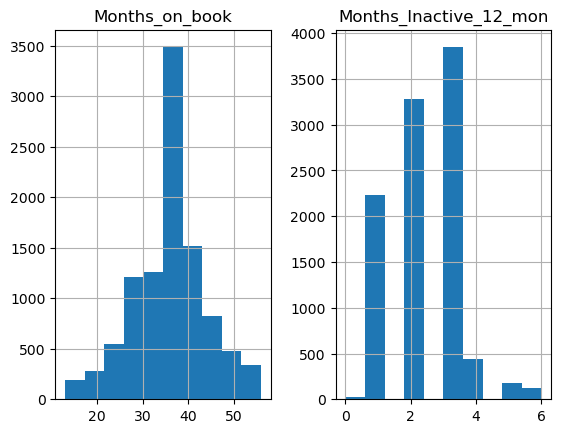

In [11]:
fig, axes = plt.subplots(1, 2)

subset_bank_churn_db.hist('Months_on_book', ax=axes[0])
subset_bank_churn_db.hist('Months_Inactive_12_mon', ax=axes[1])
plt.show()

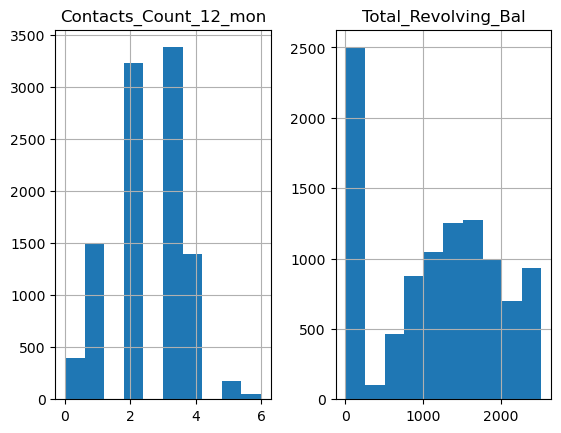

In [12]:
fig, axes = plt.subplots(1, 2)

subset_bank_churn_db.hist('Contacts_Count_12_mon', ax=axes[0])
subset_bank_churn_db.hist('Total_Revolving_Bal', ax=axes[1])
plt.show()

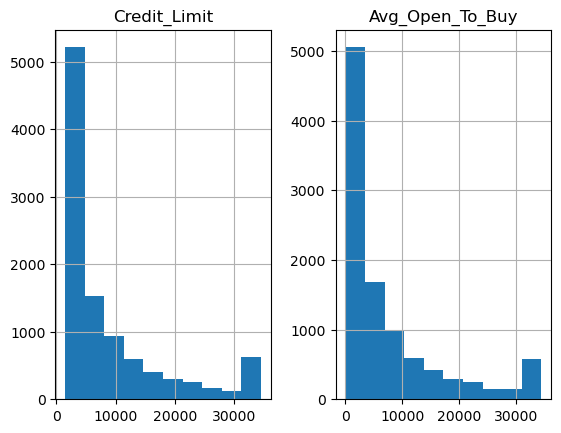

In [13]:
fig, axes = plt.subplots(1, 2)

subset_bank_churn_db.hist('Credit_Limit', ax=axes[0])
subset_bank_churn_db.hist('Avg_Open_To_Buy', ax=axes[1])
plt.show()

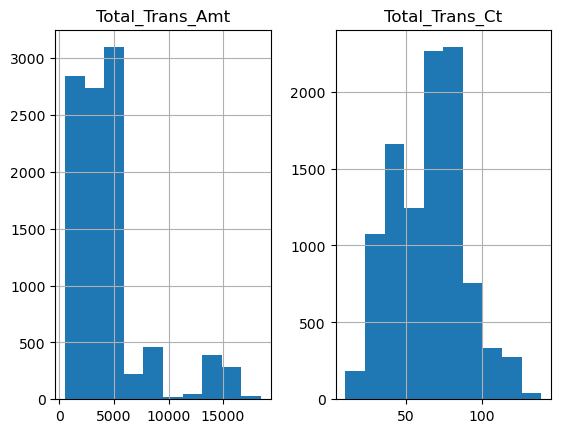

In [14]:
fig, axes = plt.subplots(1, 2)

subset_bank_churn_db.hist('Total_Trans_Amt', ax=axes[0])
subset_bank_churn_db.hist('Total_Trans_Ct', ax=axes[1])
plt.show()

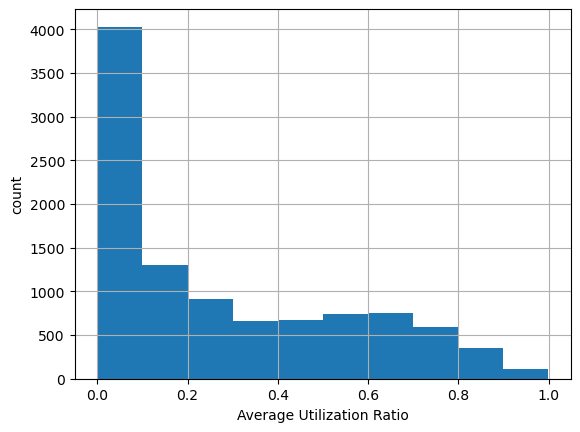

In [15]:
Utilization_Ratio = subset_bank_churn_db.Avg_Utilization_Ratio.hist()
Utilization_Ratio.set_xlabel('Average Utilization Ratio'); Utilization_Ratio.set_ylabel('count');

### D. Using different plots to compare between variables.
#### 1. What is the Age Distribution of our Dataset?

C:\Users\sidha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


46.0

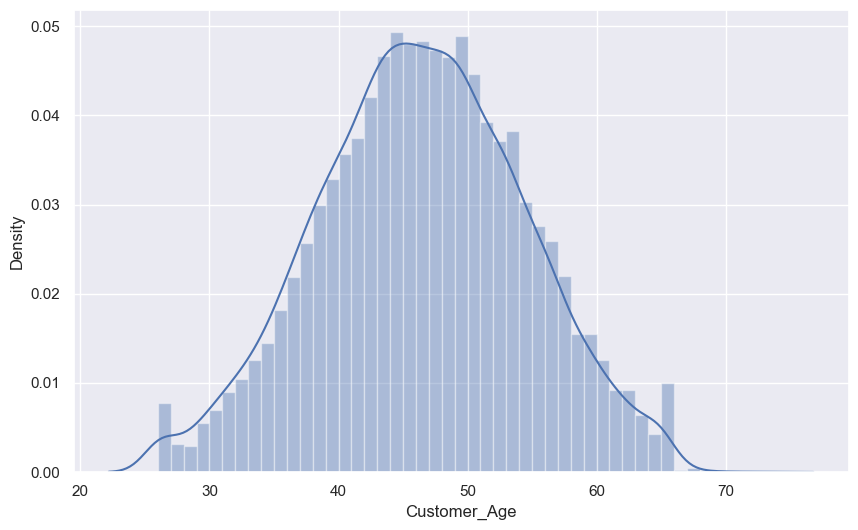

In [16]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.distplot(a=bank_churn_db['Customer_Age'])
bank_churn_db['Customer_Age'].median()

The figure above tells us the distribution of our dataset. Our dataset has median as 46 and has normal distribution. This tells us that most of the people in our dataset our missle aged and this can help us derive insights.

#### 2. Comment about the Usage Pattern of Customers belonging to Different Card Category and Income Category<br>

Average Utilization = *Credit Usage per month/Credit Limit*

<AxesSubplot:xlabel='Income_Category', ylabel='Avg_Utilization_Ratio'>

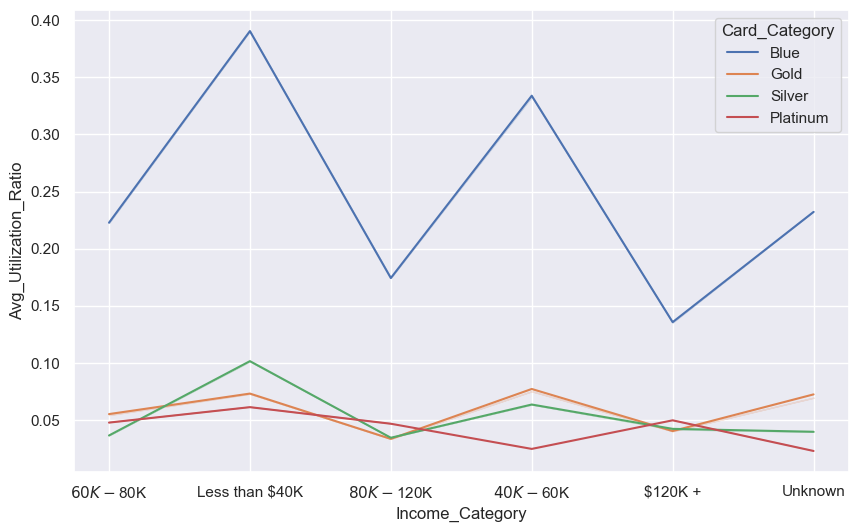

In [17]:
sns.lineplot(x=bank_churn_db['Income_Category'],
             y=bank_churn_db['Avg_Utilization_Ratio'],
             hue=bank_churn_db['Card_Category'],
             ci=0)

The above diagram shows us the Average utilization of customers in different categories based on card categories. <br>



Based on this diagram we can get following insights: <br>
        1. We can see the Average Utilization among the customers with Blue Credit Card is maximum while for Platinum is minimum among all the Income_Category except among 120K+. This makes sense as Blue Credit Card has lower Credit Limit than Platinum Card which will reduce the denominator and hence increase the Utilization Ratio. <br>
        2. We can clearly observe how in the income group of *Less than 40K* the ratio is maximum for Gold and decreases progressively from Silver, Gold to Platinum.<br>

In [18]:
%matplotlib inline

#### 3. Are there some Outliers in different variables?

<AxesSubplot:title={'center':'Months_on_book'}, xlabel='Card_Category'>

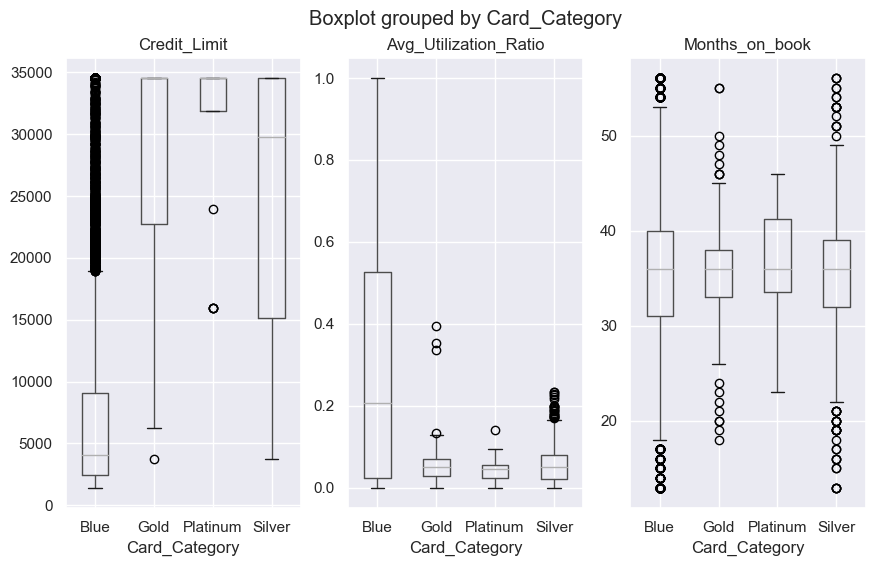

In [19]:
fig,axes = plt.subplots(nrows = 1, ncols = 3)
bank_churn_db.boxplot(column='Credit_Limit', by = 'Card_Category', ax = axes[0] )
bank_churn_db.boxplot(column='Avg_Utilization_Ratio', by = 'Card_Category', ax = axes[1] )
bank_churn_db.boxplot(column='Months_on_book', by = 'Card_Category', ax = axes[2] )

The above plot shows us the outliers in 'Credit Limit', 'Avg_Utilization_Ratio' and 'Months_on_book' wrt different Card categories. This gives us following insights:<br>
    1. We can see the median credit limit is lowest for Blue Credit Cards and Highest for Platinum Credit Cards.<br>
    2. We can observe Months on Book varies from less than 15 months to more than 50 months, while for Platinum minimum is 25 months, hence suggesting a customer need to be more loyal to get Platinum card.<br>
   3. We can onserve Average Utilization ratio for Blue cards is pretty high while pretty less for Platinum cards.

#### 4. Distribution of Revolving Balance and Credit Limit

<AxesSubplot:xlabel='Credit_Limit', ylabel='Total_Revolving_Bal'>

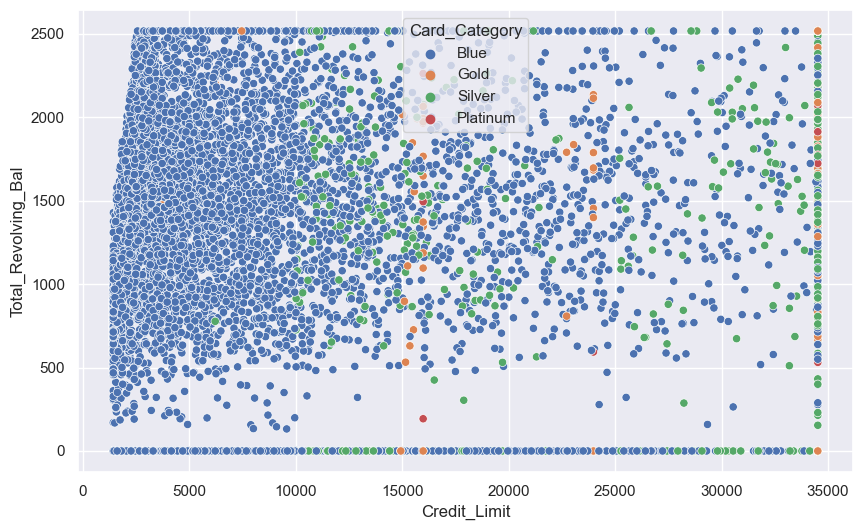

In [20]:
sns.scatterplot(x=bank_churn_db['Credit_Limit'],y=bank_churn_db['Total_Revolving_Bal'],hue=bank_churn_db['Card_Category'])

We have a very high amount of data for Blue credit card Customers in our dataset. But from this plot we can observe that higher Credit Limits is given to customers with Platinum, Gold and Silver.<br>

We can also see as the Credit limit increases the revolving balance also decreases, which makes sense as people with higher credit limit will payoff their Credit Card balances.

### E. Correlation between Quantitative variables

In [21]:
# Checking correlation between variables using corr() function

subset_bank_churn_db.corr().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,1.00,0.01,0.01,0.13,0.01,0.01,0.01,0.00,0.01,-0.02,-0.00,0.00
Customer_Age,0.01,1.00,-0.12,0.79,0.05,-0.02,0.00,0.01,0.00,-0.05,-0.07,0.01
Dependent_count,0.01,-0.12,1.00,-0.10,-0.01,-0.04,0.07,-0.00,0.07,0.03,0.05,-0.04
Months_on_book,0.13,0.79,-0.10,1.00,0.07,-0.01,0.01,0.01,0.01,-0.04,-0.05,-0.01
Months_Inactive_12_mon,0.01,0.05,-0.01,0.07,1.00,0.03,-0.02,-0.04,-0.02,-0.04,-0.04,-0.01
Contacts_Count_12_mon,0.01,-0.02,-0.04,-0.01,0.03,1.00,0.02,-0.05,0.03,-0.11,-0.15,-0.06
Credit_Limit,0.01,0.00,0.07,0.01,-0.02,0.02,1.00,0.04,1.00,0.17,0.08,-0.48
Total_Revolving_Bal,0.00,0.01,-0.00,0.01,-0.04,-0.05,0.04,1.00,-0.05,0.06,0.06,0.62
Avg_Open_To_Buy,0.01,0.00,0.07,0.01,-0.02,0.03,1.00,-0.05,1.00,0.17,0.07,-0.54
Total_Trans_Amt,-0.02,-0.05,0.03,-0.04,-0.04,-0.11,0.17,0.06,0.17,1.00,0.81,-0.08


<AxesSubplot:>

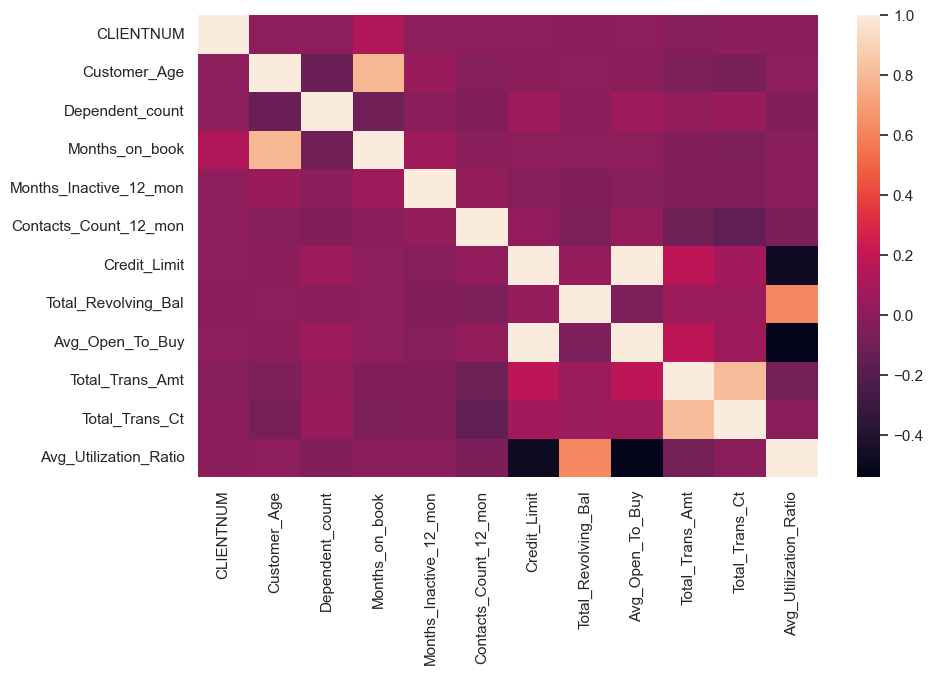

In [22]:
# Using seaborn
# Simple heatmap of correlations (without values)

import seaborn as sns 
corr = subset_bank_churn_db.corr().round(2) 
sns.heatmap(corr)

<AxesSubplot:>

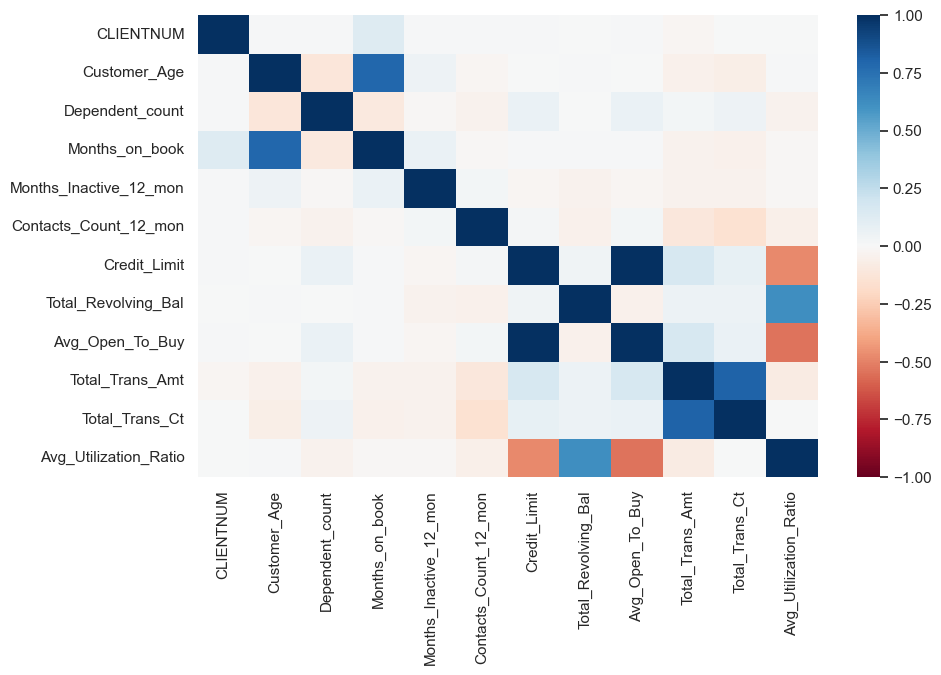

In [23]:
# Change to divergent scale and fix the range

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, 
            vmax=1, cmap="RdBu")

<AxesSubplot:>

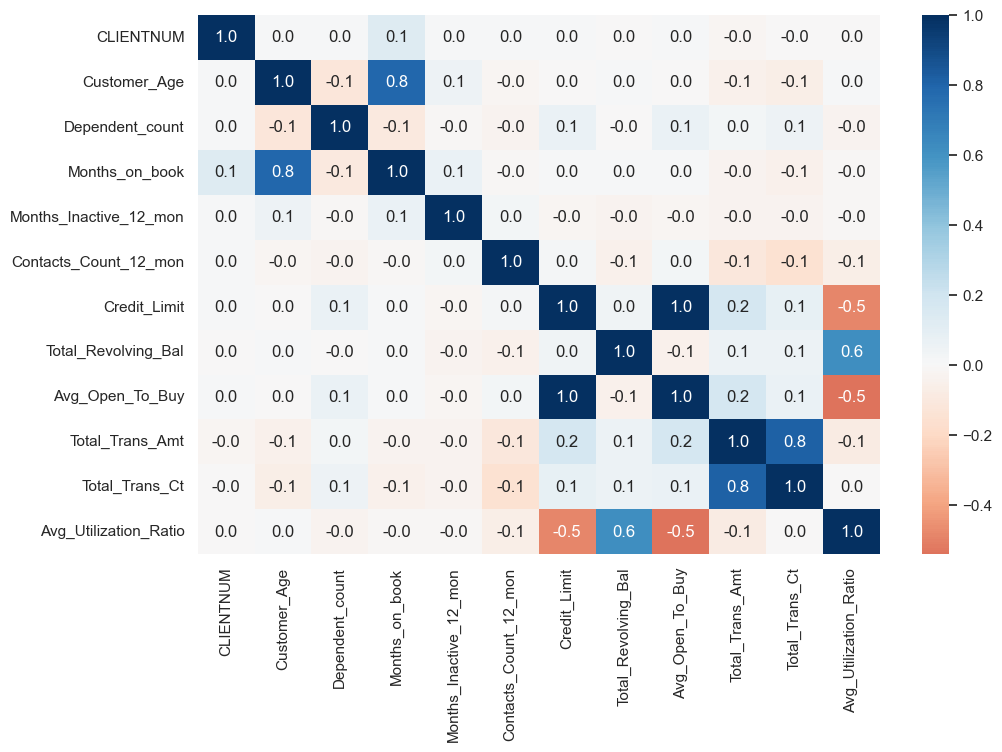

In [24]:
# Include information about values (example demonstrates how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

### Correlation between variables: 
1. 'Avg_Open_To_Buy' and 'Credit_Limit' are strongly correlated with a positive correlation of 1.
2. 'Customer_Age' and 'Months_on_book' are strongly correlated with a positive correlation of 0.8.
3. 'Total_Trans_Amt' and 'Total_Trans_Ct' are strongly correlated with a positive correlation of 0.8.

#### Removing the Correlated Variables

In [53]:
bank_churn_db = bank_churn_db.drop(columns=['Avg_Open_To_Buy','Months_on_book','Total_Trans_Ct'])
bank_churn_db.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Avg_Utilization_Ratio'],
      dtype='object')

In [54]:
bank_churn_db.shape

(10127, 15)

In [27]:
bank_churn_db.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio
6931,772687983,Existing Customer,53,M,3,Graduate,Single,$60K - $80K,Blue,3,3,8404.0,1498,4811,0.178
5433,804658833,Existing Customer,53,F,3,Unknown,Married,Less than $40K,Blue,1,2,1657.0,0,4068,0.000
2365,794551383,Existing Customer,50,F,3,College,Single,Less than $40K,Blue,3,4,4419.0,1218,4535,0.276
8765,713197308,Existing Customer,42,M,4,Graduate,Married,$60K - $80K,Silver,2,1,6224.0,0,7612,0.000
9018,814760358,Existing Customer,53,M,3,Graduate,Unknown,$40K - $60K,Blue,2,2,14627.0,1997,7766,0.137
79,710790258,Existing Customer,47,M,2,Graduate,Married,$80K - $120K,Blue,3,2,28904.0,1899,1334,0.066
4811,720519333,Attrited Customer,59,F,2,Unknown,Single,Unknown,Blue,3,3,2721.0,1885,2594,0.693
2720,716225433,Existing Customer,60,M,1,Uneducated,Single,$80K - $120K,Blue,3,4,26566.0,2517,3103,0.095
1079,719392833,Existing Customer,45,F,3,Graduate,Married,Less than $40K,Blue,3,2,2400.0,1613,1311,0.672
1787,716277558,Existing Customer,45,F,1,Uneducated,Single,Less than $40K,Blue,3,4,3281.0,1961,1779,0.598


In [55]:
#Split the data into training (60%) and testing (40%)

predictors = ['CLIENTNUM','Customer_Age', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status',
              'Income_Category', 'Card_Category', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 
              'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']
outcome = 'Attrition_Flag'

X = pd.get_dummies(bank_churn_db[predictors],drop_first=True)
y = bank_churn_db[outcome]
classes = ['Attrited Customer', 'Existing Customer']

#Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into training and validation
X_train_sc, X_valid_sc, y_train_sc, y_valid_sc = train_test_split(X_scaled, y, test_size=0.4, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

In [56]:
X_train.shape

(6076, 27)

### 1. Naive Bayes Algorithm

In [29]:
# run naive Bayes
bank_nb = MultinomialNB(alpha=0.01)
bank_nb.fit(X_train, y_train)

# predict probabilities (Shows the belonging probabilities of each record to which class)
predProb_train = bank_nb.predict_proba(X_train)
predProb_valid = bank_nb.predict_proba(X_valid)

# predict class membership (shows the class instead of probability by selecting the class with highest probability)
y_pred_nb = bank_nb.predict(X_valid)
y_train_pred = bank_nb.predict(X_train)

In [30]:
# Use the model to predict a new data

df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_pred_nb})], axis=1)
df.head(10)

,actual,predicted
6498,Existing Customer,Existing Customer
9013,Existing Customer,Existing Customer
2053,Existing Customer,Attrited Customer
3211,Existing Customer,Existing Customer
5559,Attrited Customer,Attrited Customer
6106,Existing Customer,Existing Customer
4150,Attrited Customer,Attrited Customer
2205,Existing Customer,Attrited Customer
4145,Existing Customer,Existing Customer
5324,Attrited Customer,Attrited Customer


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score on the test data
accuracy = accuracy_score(y_valid, y_pred_nb)
precision = precision_score(y_valid, y_pred_nb, average='weighted')
recall = recall_score(y_valid, y_pred_nb, average='weighted')
f1 = f1_score(y_valid, y_pred_nb, average='weighted')

In [32]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5815847938780548
Precision: 0.8030249017842371
Recall: 0.5815847938780548
F1-score: 0.6366561611628887


### 2. K-Nearest Neigbhor (KNN ) Algorithm

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [35]:
from sklearn.model_selection import GridSearchCV
knn_t = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 28)}

# Use cross-validation to find the best hyperparameters
grid = GridSearchCV(knn_t, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters for KNN:', grid.best_params_)

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best hyperparameters for KNN: {'n_neighbors': 23}


C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_sc, y_train_sc)
y_pred_knn = knn.predict(X_valid_sc)

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
accuracy_knn = accuracy_score(y_valid_sc, y_pred_knn)
print("KNN Accuracy: ", accuracy_knn)

KNN Accuracy:  0.8447296963712664


In [38]:
# Use the model to predict a new data

df_ = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_pred_knn})], axis=1)
df.head(10)

,actual,predicted
6498,Existing Customer,Existing Customer
9013,Existing Customer,Existing Customer
2053,Existing Customer,Attrited Customer
3211,Existing Customer,Existing Customer
5559,Attrited Customer,Attrited Customer
6106,Existing Customer,Existing Customer
4150,Attrited Customer,Attrited Customer
2205,Existing Customer,Attrited Customer
4145,Existing Customer,Existing Customer
5324,Attrited Customer,Attrited Customer


### 3. Logistic Regression Algorithm

In [39]:
# Create the logistic regression classifier and fit the data
bank_lr = LogisticRegression()
bank_lr.fit(X_train_sc, y_train_sc)

# Predict the test data using logistic regression and calculate the accuracy
y_pred_lr = bank_lr.predict(X_valid_sc)

In [40]:
# Use the model to predict a new data

df2 = pd.concat([pd.DataFrame({'actual': y_valid_sc, 'predicted': y_pred_lr})], axis=1)
df.head(10)

,actual,predicted
6498,Existing Customer,Existing Customer
9013,Existing Customer,Existing Customer
2053,Existing Customer,Attrited Customer
3211,Existing Customer,Existing Customer
5559,Attrited Customer,Attrited Customer
6106,Existing Customer,Existing Customer
4150,Attrited Customer,Attrited Customer
2205,Existing Customer,Attrited Customer
4145,Existing Customer,Existing Customer
5324,Attrited Customer,Attrited Customer


In [41]:
accuracy_lr = accuracy_score(y_valid_sc, y_pred_lr)
print("Logistic Regression Accuracy: ", accuracy_lr)

Logistic Regression Accuracy:  0.8632436435448038


### 4. Classification and Regression Tree

In [42]:
classTree_model = DecisionTreeClassifier(random_state=0, max_depth=7)
clfdt = classTree_model.fit(X_train, y_train)

In [43]:
# Define the range of hyperparameters to search over
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 28)}

# Use cross-validation to find the best hyperparameters
grid = GridSearchCV(classTree_model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters for CART:', grid.best_params_)

Best hyperparameters for CART: {'max_depth': 7}


In [44]:
classTree_model = DecisionTreeClassifier(random_state=0, max_depth=7)
clfdt = classTree_model.fit(X_train, y_train)

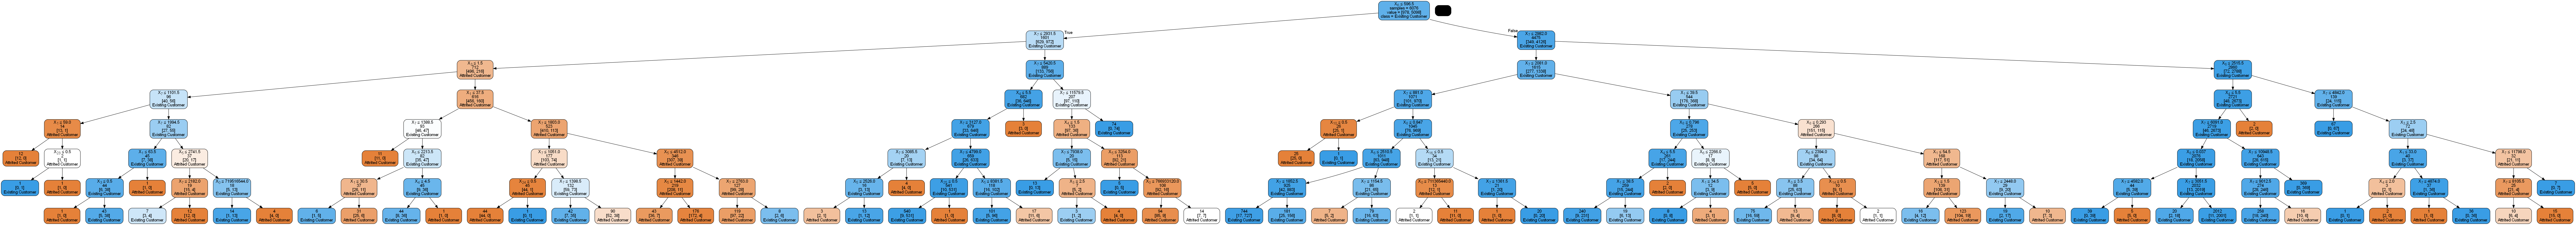

In [45]:
plotDecisionTree(classTree_model, class_names=classTree_model.classes_)

In [46]:
y_pred_dt = clfdt.predict(X_valid)

### 5. Random Forest Classification

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

In [58]:
# Use the model to predict a new data

df_rf = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_pred_rf})], axis=1)
df_rf.head(10)

,actual,predicted
6498,Existing Customer,Existing Customer
9013,Existing Customer,Existing Customer
2053,Existing Customer,Existing Customer
3211,Existing Customer,Existing Customer
5559,Attrited Customer,Attrited Customer
6106,Existing Customer,Existing Customer
4150,Attrited Customer,Attrited Customer
2205,Existing Customer,Existing Customer
4145,Existing Customer,Existing Customer
5324,Attrited Customer,Existing Customer


### Accuracy Measures

Accuracy: The proportion of correctly classified samples out of the total number of samples. It is calculated as accuracy = (TP + TN) / (TP + TN + FP + FN), where TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives, and FN is the number of false negatives.

Precision: The proportion of true positives out of the total number of positive predictions. It is calculated as precision = TP / (TP + FP).

Recall (Sensitivity): The proportion of true positives out of the total number of actual positive samples. It is calculated as recall = TP / (TP + FN).

F1-score: The harmonic mean of precision and recall. It is calculated as F1 = 2 * (precision * recall) / (precision + recall).

#### 1. KNN: Confusion Matrix 

In [59]:
cm_knn = confusion_matrix(y_valid_sc, y_pred_knn)
print(cm_knn)

[[  34  615]
 [  14 3388]]


<AxesSubplot:>

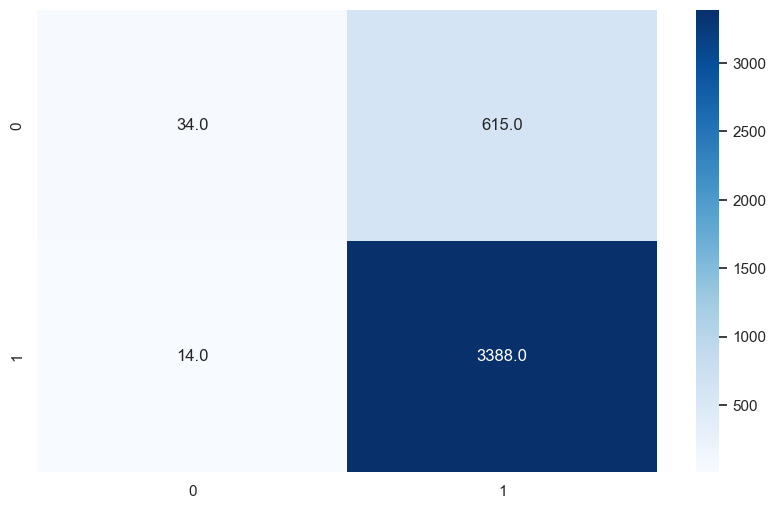

In [60]:
sns.heatmap(cm_knn,annot=True,cmap = 'Blues', fmt = '0.1f')

#### 2. Naive Bayes: Confusion Matrix 

In [61]:
cm_nb= confusion_matrix(y_valid,y_pred_nb)
cm_nb

array([[ 465,  184],
       [1511, 1891]], dtype=int64)

<AxesSubplot:>

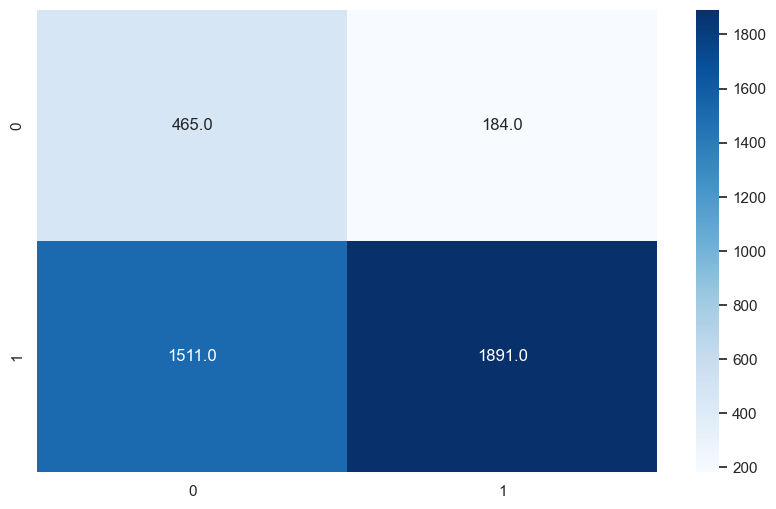

In [62]:
sns.heatmap(cm_nb,annot=True,cmap = 'Blues', fmt = '0.1f')

#### 3. Logistic Regression: Confusion Matrix 

In [63]:
cm_lr= confusion_matrix(y_valid_sc,y_pred_lr)
cm_lr

array([[ 151,  498],
       [  56, 3346]], dtype=int64)

<AxesSubplot:>

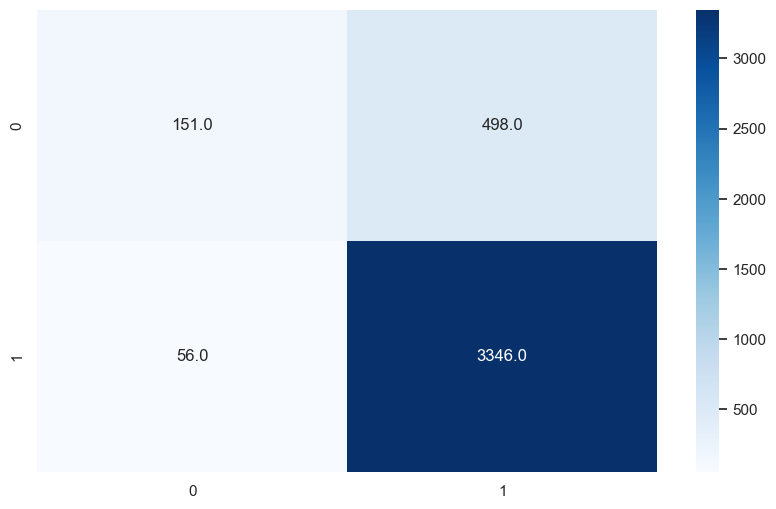

In [64]:
sns.heatmap(cm_lr,annot=True,cmap = 'Blues', fmt = '0.1f')

#### 4. Classification and Regression Tree: Confusion Matrix 

In [65]:
cm_dt = confusion_matrix(y_valid,y_pred_dt)
cm_dt

array([[ 457,  192],
       [ 164, 3238]], dtype=int64)

<AxesSubplot:>

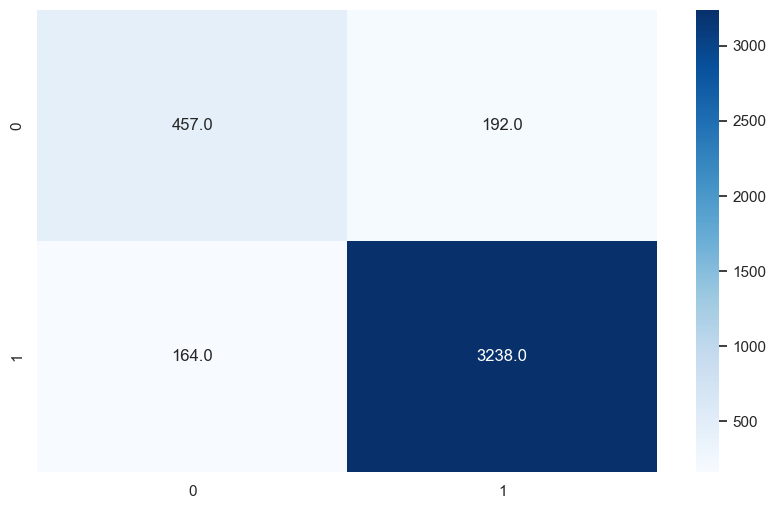

In [66]:
sns.heatmap(cm_dt,annot=True,cmap = 'Blues', fmt = '0.1f')

#### 5. Random Forest Classification: Confusion Matrix 

In [67]:
cm_rf = confusion_matrix(y_valid,y_pred_rf)
cm_rf

array([[ 315,  334],
       [  72, 3330]], dtype=int64)

<AxesSubplot:>

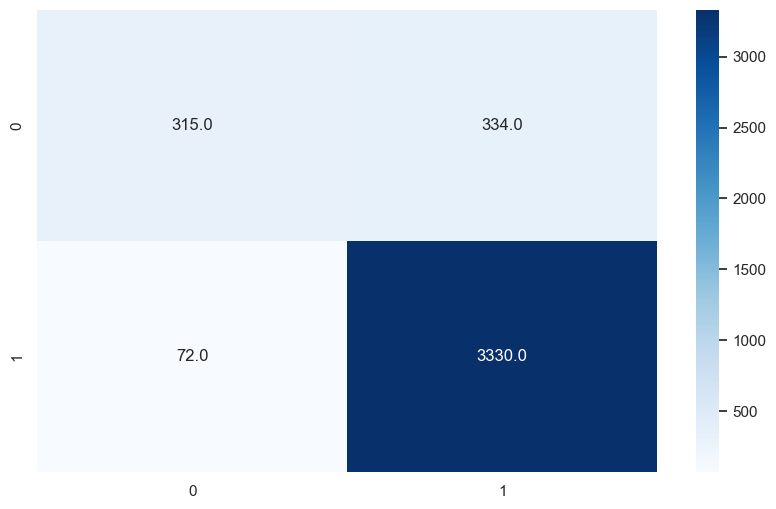

In [68]:
sns.heatmap(cm_rf,annot=True,cmap = 'Blues', fmt = '0.1f')

In [69]:
#KNN Accuracy
Accuracy_Knn = (34+3388)/(34+3388+615+14)
Precision_knn = 3388/(3388+615)
Recall_knn = 3388/(3388+14)
F1_Score_knn = 2*Precision_knn*Recall_knn/(Precision_knn+Recall_knn)

In [70]:
# Naive Baiyes Accuracy
Accuracy_nb = (465+1891)/(465+1891+184+1511)
Precision_nb = 1891/(1891+184)
Recall_nb = 1891/(1891+1511)
F1_Score_nb = 2*Precision_nb*Recall_nb/(Precision_nb+Recall_nb)

In [71]:
# Logistic Regression Accuracy
Accuracy_lr = (151+3346)/(151+498+56+3346)
Precision_lr = 3346/(3346+498)
Recall_lr = 3346/(3346+56)
F1_Score_lr =  2*Precision_lr*Recall_lr/(Precision_lr+Recall_lr)

In [72]:
# Classification and Regression Tree Accuracy
Accuracy_dt = (457+3238)/(457+3238+192+164)
Precision_dt = 3238/(3238+192)
Recall_dt = 3238/(3238+164)
F1_Score_dt = 2*Precision_dt*Recall_dt/(Precision_dt+Recall_dt)

In [73]:
# Random Forest Classification Accuracy
Accuracy_rf = (315+3330)/(315+3330+334+72)
Precision_rf = 3330/(3330+334)
Recall_rf = 3330/(3330+72)
F1_Score_rf = 2*Precision_rf*Recall_rf/(Precision_rf+Recall_rf)

In [74]:
acc_score = {"Parameter": ['Accuracy','Precision','Recall','F1-Score'], 
             "Naive Bayes": [Accuracy_nb,Precision_nb,Recall_nb,F1_Score_nb], 
             "KNN": [Accuracy_Knn,Precision_knn,Recall_knn,F1_Score_knn], 
             "Logistic Regression": [Accuracy_lr,Precision_lr,Recall_lr,F1_Score_lr],
             "Decision Tree": [Accuracy_dt,Precision_dt,Recall_dt,F1_Score_dt],
             "Random Forest": [Accuracy_rf,Precision_rf,Recall_rf,F1_Score_rf]}

In [75]:
acc_score = pd.DataFrame(acc_score)
acc_score

,Parameter,Naive Bayes,KNN,Logistic Regression,Decision Tree,Random Forest
0,Accuracy,0.581585,0.844730,0.863244,0.912120,0.899778
1,Precision,0.911325,0.846365,0.870447,0.944023,0.908843
2,Recall,0.555850,0.995885,0.983539,0.951793,0.978836
3,F1-Score,0.690524,0.915057,0.923544,0.947892,0.942542


### Conclusion:

We ran Naive Bayes, K-Nearest Neigbhor (KNN), Logistic Regression and Decision Tree algorithms on our Bank Customer Churn dataset and predicted values for a test dataset for all. After analyzing and comparing the above accuracy measure results, we can say that Decision Tree algorithm gives the best result as compared to other models on our dataset. 

1. KNN model gives 83.14% accurate prediction.
2. Naive Bayes model gives 58.16% accurate prediction.
3. Logistic Regression gives 86.32% accurate prediction.
4. Decision Tree gives 91.21% accurate prediction.
5. Random Forest classifier gives 89.98% accurate prediction.